<a href="https://colab.research.google.com/github/samikshae/seportfolio/blob/main/Student_EmotionDetection_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports the required libraries
import cv2
import dlib
import math
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat"
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'

print ("Done")

shape_predictor_68_ 100%[===================>]  95.08M   148MB/s    in 0.6s    
Done


In [ ]:
import cv2
import dlib
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
from sklearn import metrics
from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import io
# ?pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
# warnings.filterwarnings("ignore")

%pip install googledrivedownloader
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1hNLedQCRl8uutOwtXWxBmiW3x7bckj4u',
#                                     dest_path='./ferdata.csv', overwrite=True,showsize=True)
#Getting the csv data loaded
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/fer2013_5.csv'

###Getting the Dlib Shape predictor!
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat'

###Getting the Xpure loaded
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/pureX.npy'

###Getting the Xdata loaded
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/dataX.npy'

###Getting the Ydata loaded
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/dataY.npy'

print ("Data Downloaded!")

fer2013_5.csv       100%[===================>] 159.97M   183MB/s    in 0.9s    
shape_predictor_68_ 100%[===================>]  95.08M   183MB/s    in 0.5s    
pureX.npy           100%[===================>]  43.95M   122MB/s    in 0.4s    
dataX.npy           100%[===================>] 347.59M   197MB/s    in 1.8s    
dataY.npy           100%[===================>] 156.38K  --.-KB/s    in 0.002s  
Data Downloaded!


In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [ ]:
'''
  Converts dlib rectangular object to bounding box coordinates
'''
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)


In [ ]:
"""
Detects the face in the given image
"""
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None

  """
  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    return "Please check the URL and try again!"

  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)

  if len(rects) < 1:
    return "No Face Detected"

  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box coordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()


Enter the URL of the image: https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg


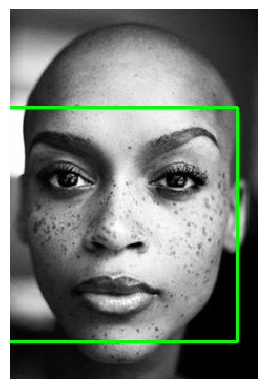

In [ ]:
# https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg
# https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg

# Give the path of the image for face detection
detect_face(input('Enter the URL of the image: '));  # run cell and when prompted, input a URL of an img and press 'enter'!

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [ ]:
"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents
                     the x and y coordinates of facial keypoints
  """

  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None

  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None

  return image,landmarks

In [ ]:
"""
Display image with its Facial Landmarks
"""
def plot_image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents
                     the x and y coordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)

  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()


Enter the URL of the image: https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg


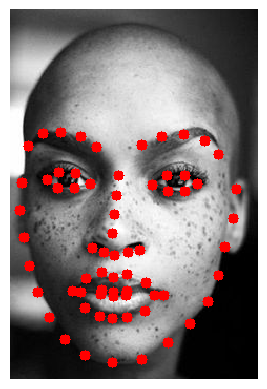

In [ ]:
#Extract the Facial Landmark coordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  plot_image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [ ]:
def show_indices(landmarks, i_index):

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices')

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index?
  x = landmarks[i_index][0]
  y = -landmarks[i_index][1]
  plt.scatter(x=x, y=y,
             color='purple', s=100, marker='x', label='feature at index %d'%i_index)

  plt.scatter(x, y, color='red', alpha=.5, label='selected indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1]);
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2);

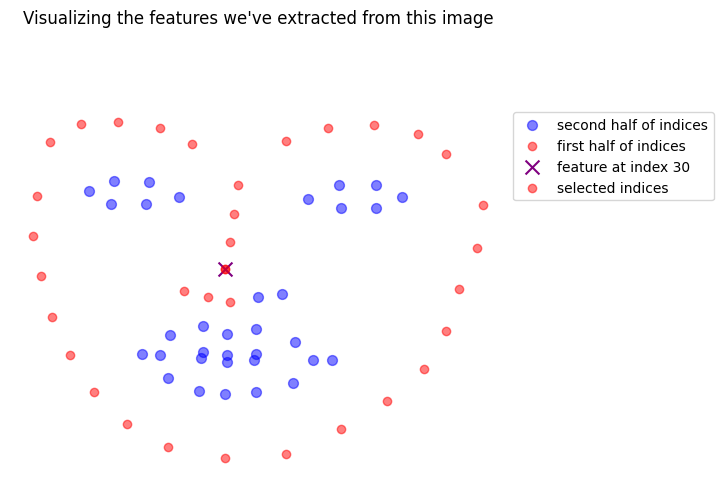

In [ ]:
show_index = 30
show_indices(landmarks, show_index)

In [ ]:
np.array(landmarks).shape

(68, 2)

In [ ]:
LeftEye= "36-41" #@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]
RightEye = "42-47"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]
Eyebrows = "17-26"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]
Nose = "27-35"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]
Mouth = "48-67"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]
Jawline = "0-16"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]




if LeftEye == "36-41":
  print("The Left eye can be accessed through points %s"%LeftEye)
else:
  print('Not quite %s'%LeftEye)

if RightEye == "42-47":
  print("The Right eye can be accessed through points %s"%RightEye)
else:
  print('Not quite %s'%RightEye)

if Eyebrows == "17-26":
  print("The Eyebrows can be accessed through points %s"%Eyebrows)
else:
  print('Not quite %s'%Eyebrows)

if Nose == "27-35":
  print("The Nose can be accessed through points %s"%Nose)
else:
  print('Not quite %s'%Nose)

if Mouth == "48-67":
  print("The Mouth can be accessed through points %s"%Mouth)
else:
  print('Not quite %s'%Mouth)

if Jawline == "0-16":
  print("The Jawline can be accessed through points %s"%Jawline)
else:
  print('Not quite %s'%Jawline)



The Left eye can be accessed through points 36-41
The Right eye can be accessed through points 42-47
The Eyebrows can be accessed through points 17-26
The Nose can be accessed through points 27-35
The Mouth can be accessed through points 48-67
The Jawline can be accessed through points 0-16


In [ ]:
landmark_indices = {'eyes':(36,47),
                    "nose":(27,35),
                    "mouth":(48,67),
                    "jawline":(0,17),
                    "eyebrow":(18,27)}

[(35, 162), (46, 155), (62, 156), (76, 166), (61, 170), (45, 170), (135, 167), (149, 158), (166, 158), (178, 166), (166, 173), (150, 173)]


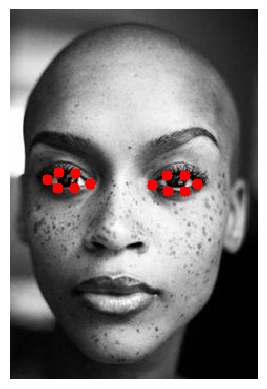

Eye Detection
[(103, 158), (101, 177), (99, 195), (97, 213), (78, 227), (89, 231), (99, 234), (112, 231), (123, 229)]


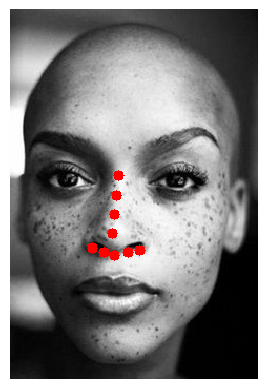

Nose Detection
[(59, 268), (72, 256), (87, 250), (98, 255), (111, 252), (129, 260), (146, 272), (128, 287), (111, 293), (97, 294), (85, 292), (71, 284), (67, 269), (87, 267), (98, 269), (111, 268), (137, 272), (110, 272), (98, 273), (86, 271)]


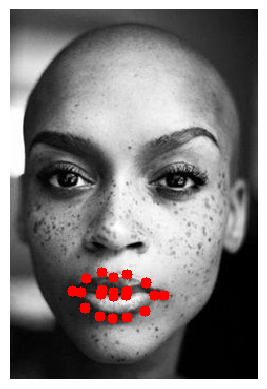

Mouth Detection
[(11, 165), (9, 191), (13, 217), (18, 244), (26, 269), (37, 293), (52, 314), (71, 329), (97, 336), (125, 333), (150, 317), (171, 299), (188, 278), (198, 253), (204, 226), (212, 199), (215, 171), (17, 130)]


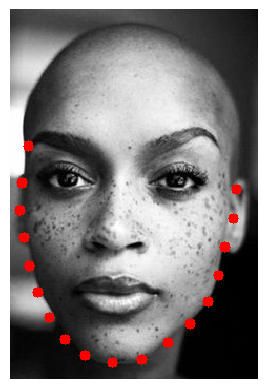

Jaw Detection
[(31, 118), (48, 117), (67, 121), (82, 131), (125, 129), (144, 121), (165, 119), (185, 125), (198, 138), (103, 158)]


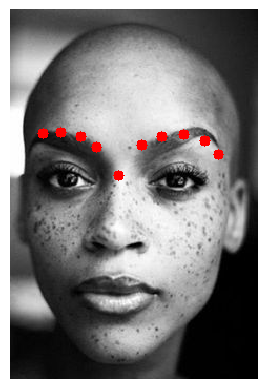

Eyebrow Detection


In [ ]:
# Display images with individual detection of face parts

eye_points = np.array([36,47])
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image,selected_landmarks)
print("Eye Detection")
### YOUR CODE HERE
nose_points = np.array([27,35])
selected_landmarks = landmarks[nose_points[0]:nose_points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image,selected_landmarks)
print("Nose Detection")

mouth_points = np.array([48,67])
selected_landmarks = landmarks[mouth_points[0]:mouth_points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image,selected_landmarks)
print("Mouth Detection")

jaw_points = np.array([0,17])
selected_landmarks = landmarks[jaw_points[0]:jaw_points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image,selected_landmarks)
print("Jaw Detection")

eyebrow_points = np.array([18,27])
selected_landmarks = landmarks[eyebrow_points[0]:eyebrow_points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image,selected_landmarks)
print("Eyebrow Detection")
### END CODE

In [ ]:
"""
Computes the euclidean distance between 2 points in 2D space
#inexing#math.sqrt
"""
def euclidean_distance(p1,p2):
  """
  type p1, p2 : tuple
  rtype distance: float
  """
distance = math.sqrt()

In [ ]:
"""
Distinguishes between two images--->closed eyes v/s open eyes
"""
def classify_images(image1_path,image2_path,plt_flag):
  """
  type image1_path,image2_path: str
  type plt_flag: boolean #Displays input images if True
  rtype : str
  """
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)

  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()